In [1]:
import pandas as pd
import numpy as np
import os
import re
import json

In [2]:
event_files=[os.path.join(root,f) for root,dirs,files in os.walk('../bids') for f in files if f.endswith('events.tsv')]
data=[]
for file in event_files:
    sub='sub-'+re.search('func/sub-(.*)_task',file).group(1)
    acq=re.search('_acq-(.*)_events',file).group(1)
    tmp_df=pd.read_csv(file,sep='\t')
    if tmp_df.shape[0]>0:
        tmp_df['sub']=sub
        tmp_df['acq']=acq
        data.append(tmp_df)
events_df=pd.concat(data)
events_df['sub'].unique()

array(['sub-10154', 'sub-10142', 'sub-10296', 'sub-12042', 'sub-10137',
       'sub-10223', 'sub-10203', 'sub-10108', 'sub-10318', 'sub-10085',
       'sub-10188', 'sub-10186', 'sub-10319', 'sub-10035', 'sub-10198',
       'sub-10150', 'sub-10074', 'sub-10234', 'sub-10043', 'sub-10069',
       'sub-10303', 'sub-10059', 'sub-10078', 'sub-10136', 'sub-10017',
       'sub-10080', 'sub-10094', 'sub-10221', 'sub-10130', 'sub-10054',
       'sub-10125', 'sub-10166', 'sub-10024', 'sub-10185', 'sub-10321'],
      dtype=object)

In [13]:
events_df

,onset,duration,trial_type,response_time,sub,acq
0,4.004917,2.266844,guess_rightButton_computer,2.266844,sub-10154,mb1me1
1,8.207700,1.007000,outcome_computer_punish,NaN,sub-10154,mb1me1
2,13.387088,0.417971,guess_leftButton_face,0.417971,sub-10154,mb1me1
3,18.439658,1.005890,outcome_stranger_punish,NaN,sub-10154,mb1me1
4,23.451828,1.453372,guess_leftButton_computer,1.453372,sub-10154,mb1me1
...,...,...,...,...,...,...
103,401.190788,1.005470,outcome_computer_neutral,NaN,sub-10321,mb6me1
104,406.366118,2.068265,guess_rightButton_face,2.068265,sub-10321,mb6me1
105,410.568208,1.003660,outcome_stranger_neutral,NaN,sub-10321,mb6me1
106,413.577188,1.757461,guess_leftButton_computer,1.757461,sub-10321,mb6me1


In [ ]:
# 'sub-10318' (6_4), 'sub-10319' (6_4), 'sub-10198' (1_1), 'sub-10234' (6_4), 'sub-10303' (3_4),

In [19]:
data=[]
for sub in events_df['sub'].unique():
    print(sub)
    #try: 
    for acq in events_df['acq'].unique():

        fname='../derivatives/fsl/mcflirt/%s/%s/_abs.rms'%(sub,acq)
        if os.path.exists(fname):
            absolute=np.loadtxt('../derivatives/fsl/mcflirt/%s/%s/_abs.rms'%(sub,acq))
            FD=np.loadtxt('../derivatives/fsl/mcflirt/%s/%s/_rel.rms'%(sub,acq))
            if acq in ['mb1me4','mb3me4','mb6me4']:
                fname = '/data/projects/rf1-sequence-pilot/derivatives/mriqc/%s/func/%s_task-sharedreward_acq-%s_echo-1_bold.json'%(sub,sub,acq)
                if os.path.exists(fname):
                    f = open(fname)
                else:
                    print(sub,acq,' does not exist')
            else:
                fname = '/data/projects/rf1-sequence-pilot/derivatives/mriqc/%s/func/%s_task-sharedreward_acq-%s_bold.json'%(sub,sub,acq)
                if os.path.exists(fname):
                    f = open(fname)
                else:
                    print(sub,acq,' does not exist')
            mriqc=json.load(f)
            mriqc=mriqc["fd_mean"]
            f.close()
            fname = "/data/projects/rf1-sequence-pilot/derivatives/fmriprep/%s/func/%s_task-sharedreward_acq-%s_desc-confounds_timeseries.tsv"%(sub,sub,acq)
            if os.path.exists(fname):
                fmriprep=pd.read_csv(fname,
                                    sep='\t')
                fmriprep=np.mean(fmriprep['rmsd'])
                row=[sub,acq,
                     np.divide(
                         events_df[(events_df['sub']==sub)&(events_df['acq']==acq)]['trial_type'].str.count('miss').sum()
                         ,2),
                    absolute.max(),FD.mean(),mriqc,fmriprep]

                data.append(row)
        else:
            print(fname + ' missing')
    #except:
        #print('problem with %s' %(sub))
        
exclusions_df=pd.DataFrame(data=data,columns=['sub','acq','TrialCount_misses','Max_Abs_motion','MCFLIRT_FD','mriqc','fmriprep'])
exclusions_df['FD_exclusion']=exclusions_df['MCFLIRT_FD']>0.5
exclusions_df['ABS_exclusion']=exclusions_df['Max_Abs_motion']>1.35
exclusions_df['Beh_TrialExclusion']=exclusions_df['TrialCount_misses']>27


sub-10154
sub-10142
sub-10296
../derivatives/fsl/mcflirt/sub-10296/mb6me4/_abs.rms missing
sub-12042
sub-10137
sub-10223
sub-10203
sub-10108
sub-10318
../derivatives/fsl/mcflirt/sub-10318/mb6me4/_abs.rms missing
sub-10085
sub-10188
sub-10186
sub-10319
../derivatives/fsl/mcflirt/sub-10319/mb6me4/_abs.rms missing
sub-10035
sub-10198
../derivatives/fsl/mcflirt/sub-10198/mb1me1/_abs.rms missing
sub-10150
sub-10074
sub-10234
../derivatives/fsl/mcflirt/sub-10234/mb6me4/_abs.rms missing
sub-10043
sub-10069
sub-10303
../derivatives/fsl/mcflirt/sub-10303/mb3me4/_abs.rms missing
sub-10059
sub-10078
sub-10136
sub-10017
sub-10080
sub-10094
sub-10221
sub-10130
sub-10054
sub-10125
sub-10166
sub-10024
sub-10185
sub-10321


In [22]:
exclusions_df=exclusions_df.sort_values(by=['sub','acq'])
exclusions_df.to_csv('../derivatives/run_exclusions.csv', index=False)

pearson product moment for MCFLIRT and MRIQC r: 0.9913956685758563 p: 1.6089369884532907e-148


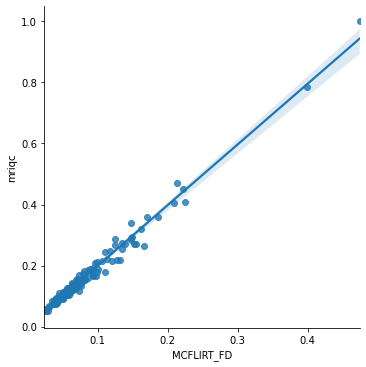

pearson product moment for MCFLIRT and fmriprep r: 0.9655039426055719 p: 6.302178752943562e-99


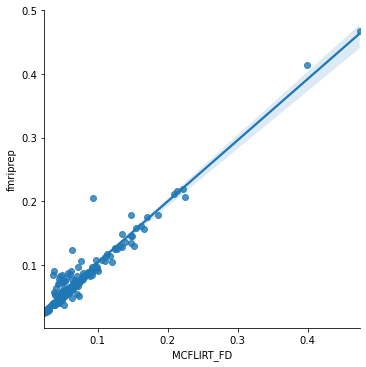

In [10]:
import seaborn as sms
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
exclusions_df.head()


r,p=pearsonr(exclusions_df['MCFLIRT_FD'],exclusions_df['mriqc'])
print("pearson product moment for MCFLIRT and MRIQC r: %s p: %s" %(r,p))
sms.lmplot(x='MCFLIRT_FD',y='mriqc',data=exclusions_df)
plt.show()

r,p=pearsonr(exclusions_df['MCFLIRT_FD'],exclusions_df['fmriprep'])
print("pearson product moment for MCFLIRT and fmriprep r: %s p: %s" %(r,p))
sms.lmplot(x='MCFLIRT_FD',y='fmriprep',data=exclusions_df)


In [12]:
fmriprep

0.03994761076595743

In [11]:
corr_df=exclusions_df[['MCFLIRT_FD','fmriprep','mriqc']]
display(corr_df.corr())

,MCFLIRT_FD,fmriprep,mriqc
MCFLIRT_FD,1.000000,0.965504,0.991396
fmriprep,0.965504,1.000000,0.961067
mriqc,0.991396,0.961067,1.000000


In [12]:

results=exclusions_df.groupby(by='sub').sum().reset_index().rename(columns={"TrialCount_misses": "TotalCount_misses"})
results['Beh_TotalExclusion']=results['TotalCount_misses']>81
results=results[['sub','TotalCount_misses','Beh_TotalExclusion']]


In [13]:
exclusions_df.merge(results,on='sub')
exclusions_df.to_csv('../derivatives/exclusions.csv', index=False)

In [14]:
exclusions_df.groupby(by='sub').sum()

,TrialCount_misses,Max_Abs_motion,MCFLIRT_FD,mriqc,fmriprep,FD_exclusion,ABS_exclusion,Beh_TrialExclusion
sub,,,,,,,,
sub-10017,1.0,4.135335,0.280834,0.580014,0.321199,0,0,0
sub-10024,4.0,3.286222,0.333501,0.709166,0.378951,0,0,0
sub-10035,33.0,2.748913,0.300442,0.654800,0.349378,0,0,0
sub-10043,3.0,4.666819,0.334741,0.650755,0.354596,0,0,0
sub-10054,13.0,4.730377,0.499728,1.024692,0.515646,0,1,0
sub-10059,0.0,3.283416,0.289011,0.584525,0.318022,0,0,0
sub-10069,7.0,7.064291,0.586771,1.171834,0.615826,0,2,0
sub-10074,4.0,4.583511,0.365633,0.741471,0.345310,0,0,0
sub-10078,5.0,3.035449,0.336285,0.671263,0.345337,0,0,0
